In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

import os

# Pre-processing

In [2]:
testPath = 'dataset/output/test/'
trainPath = 'dataset/output/train/'

testX = []
trainX = []

testY = []
trainY = []

fruits = os.listdir(testPath)
for fruit in fruits:
    images = os.listdir(testPath + "/" + fruit)
    for img in images:
        image = cv2.imread(testPath + "/" + fruit + "/" + img)
        image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA)
        testX.append(image)
        testY.append(fruit)
        
fruits = os.listdir(trainPath)
for fruit in fruits:
    images = os.listdir(trainPath + "/" + fruit)
    for img in images:
        image = cv2.imread(trainPath + "/" + fruit + "/" + img)
        image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA)
        trainX.append(image)
        trainY.append(fruit)

testX = np.array(testX)
trainX = np.array(trainX)

testY = np.array(testY)
trainY = np.array(trainY)

In [3]:
trainX.shape

(4800, 50, 50, 3)

In [4]:
trainY.shape

(4800,)

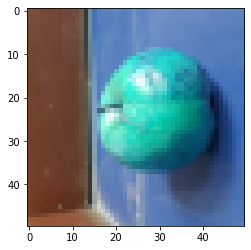

In [5]:
plt.imshow(testX[9])

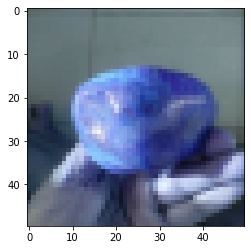

In [6]:
plt.imshow(trainX[700])

### To GrayScale

In [7]:
def grayScale(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    return gray

In [8]:
for i in range(len(testX)):
    testX[i] = grayScale(testX[i])

In [9]:
for i in range(len(trainX)):
    trainX[i] = grayScale(trainX[i])

### Proccessing the image

In [10]:
# convert from integers to floats and normalize to range 0-1
norm_trainX = trainX.astype('float32')/255.0
norm_testX = testX.astype('float32')/255.0

In [11]:
norm_testX.shape

(1200, 50, 50, 3)

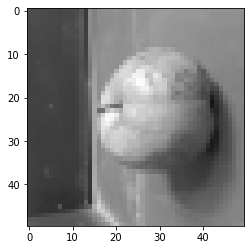

In [12]:
plt.imshow(testX[9])

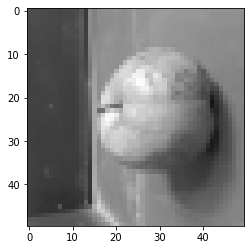

In [13]:
plt.imshow(norm_testX[9])

# CNN Model

inputs = Input(shape = (128, 128, 3))

conv1 = Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(120, 120, 3))(inputs)

maxP1 = MaxPooling2D(pool_size=2, strides=2)(conv1)

conv2 = Conv2D(filters=32, kernel_size=3, activation='relu')(maxP1)

maxP2 = MaxPooling2D(pool_size=2, strides=2)(conv2)

flattern = Flatten()(maxP2)

dense1 = Dense(units=32, activation='relu')(flattern)

output = Dense(units=3, activation='softmax')(dense1)

model = Model(inputs=inputs, outputs=output)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(x = norm_trainX, y = trainY, epochs = 10, batch_size=32)

model.save('food_grading')

In [14]:
fruits = []
for i in testY:
    if i not in fruits:
        fruits.append(i)


In [15]:
len(fruits)

3

In [16]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))

cnn.add(MaxPooling2D((2, 2)))

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))

cnn.add(MaxPooling2D((2, 2)))

cnn.add(Flatten())

cnn.add(Dense(units=32, activation='relu')) #hidden layers

cnn.add(Dense(units=3, activation='softmax')) #output layer

# compile model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x=norm_trainX, y=trainY, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\cheta\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 1) and (32, 3) are incompatible


In [ ]:
cnn.save('food_grading')

In [ ]:
import numpy as np
from keras.preprocessing import image
classes = training_set.class_indices
print(classes)
d = dict()
for i in classes.keys():
    d[classes[i]] = i
print(d)
def testModel(path):
    test_image = image.load_img(path, target_size = (128,128))
    plt.imshow(test_image)
    test_image_array = image.img_to_array(test_image)
    test_image_array = np.expand_dims(test_image_array, axis=0)
    result = model.predict(test_image_array)
    print(result[0])
    pr = np.argmax(result[0])
    prediction = d[pr]
    print(prediction)

In [ ]:
testModel('dataset/single_pred/apple_or_banana1.jfif')

In [ ]:
testModel('dataset/single_pred/apple_or_banana2.png')

In [ ]:
testModel('dataset/single_pred/apple_or_banana3.jfif')

In [ ]:
testModel('dataset/single_pred/apple_or_banana4.jfif')

In [ ]:
testModel('dataset/single_pred/apple_or_banana5.png')

In [ ]:
testModel('dataset/single_pred/apple_or_banana6.jpg')

In [ ]:
testModel('dataset/single_pred/apple_or_banana7.jfif')

In [ ]:
testModel('dataset/single_pred/apple_or_banana8.png')